In [2]:
import pandas as pd
mvc = pd.read_csv('MVC.csv')

/var/folders/wt/m5y59zzs6md5sgv_pfb_w9tm0000gn/T/ipykernel_44254/629964291.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  mvc = pd.read_csv('MVC.csv')


In [3]:
mvc.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [4]:
mvc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075961 entries, 0 to 2075960
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [5]:
total_nans = mvc.isna().sum().sum()
print(f"Total NaNs in DataFrame: {total_nans}")

Total NaNs in DataFrame: 17766266


In [7]:
nan_counts_per_row = mvc.isna().sum(axis=1)
print(nan_counts_per_row)


0          12
1          15
2          13
3          10
4          11
           ..
2075956     3
2075957     8
2075958     7
2075959     7
2075960     8
Length: 2075961, dtype: int64


In [9]:
# checking NaN proportions for each column
nan_proportion = mvc.isna().sum() / len(mvc)
print(nan_proportion)

CRASH DATE                       0.000000
CRASH TIME                       0.000000
BOROUGH                          0.311146
ZIP CODE                         0.311266
LATITUDE                         0.112559
LONGITUDE                        0.112559
LOCATION                         0.112559
ON STREET NAME                   0.212293
CROSS STREET NAME                0.378002
OFF STREET NAME                  0.832204
NUMBER OF PERSONS INJURED        0.000009
NUMBER OF PERSONS KILLED         0.000015
NUMBER OF PEDESTRIANS INJURED    0.000000
NUMBER OF PEDESTRIANS KILLED     0.000000
NUMBER OF CYCLIST INJURED        0.000000
NUMBER OF CYCLIST KILLED         0.000000
NUMBER OF MOTORIST INJURED       0.000000
NUMBER OF MOTORIST KILLED        0.000000
CONTRIBUTING FACTOR VEHICLE 1    0.003278
CONTRIBUTING FACTOR VEHICLE 2    0.155045
CONTRIBUTING FACTOR VEHICLE 3    0.928554
CONTRIBUTING FACTOR VEHICLE 4    0.983866
CONTRIBUTING FACTOR VEHICLE 5    0.995629
COLLISION_ID                     0

In [23]:
# Drop columns with NaN proportion greater than the threshold

threshold = 0.5

mvc_cleaned = mvc.loc[:, nan_proportion <= threshold]

mvc_cleaned.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,...,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,...,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,...,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,0.0,...,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0.0,...,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN


In [24]:
mvc_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075961 entries, 0 to 2075960
Data columns (total 22 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   NUMBER OF PERSONS INJURED      float64
 10  NUMBER OF PERSONS KILLED       float64
 11  NUMBER OF PEDESTRIANS INJURED  int64  
 12  NUMBER OF PEDESTRIANS KILLED   int64  
 13  NUMBER OF CYCLIST INJURED      int64  
 14  NUMBER OF CYCLIST KILLED       int64  
 15  NUMBER OF MOTORIST INJURED     int64  
 16  NUMBER OF MOTORIST KILLED      int64  
 17  CONTRIBUTING FACTOR VEHICLE 1  object 
 18  CO

In [28]:
# Convert the crash date column from string to datetime format
mvc_cleaned['CRASH DATE'] = pd.to_datetime(mvc_cleaned['CRASH DATE'], format='%m/%d/%Y')

# Convert the date column to Epoch time (number of seconds since 01-01-1970)
mvc_cleaned['epoch_time'] = (mvc_cleaned['CRASH DATE'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

mvc_cleaned.head()

/var/folders/wt/m5y59zzs6md5sgv_pfb_w9tm0000gn/T/ipykernel_44254/1592799702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_cleaned['CRASH DATE'] = pd.to_datetime(mvc_cleaned['CRASH DATE'], format='%m/%d/%Y')
/var/folders/wt/m5y59zzs6md5sgv_pfb_w9tm0000gn/T/ipykernel_44254/1592799702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_cleaned['epoch_time'] = (mvc_cleaned['CRASH DATE'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,epoch_time
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,...,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,1631318400
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,...,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN,1648252800
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,...,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,1656460800
3,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,0.0,...,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN,1631318400
4,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0.0,...,0,0,0,0,NaN,NaN,4486609,NaN,NaN,1639440000


In [30]:
# Dropping original crash date column 
mvc_cleaned = mvc_cleaned.drop('CRASH DATE', axis=1)

KeyError: "['CRASH DATE'] not found in axis"

In [31]:
mvc_cleaned.head()

,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,epoch_time
0,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,...,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,1631318400
1,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,...,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN,1648252800
2,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,0.0,...,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,1656460800
3,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,0.0,0.0,...,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN,1631318400
4,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0.0,0.0,...,0,0,0,0,NaN,NaN,4486609,NaN,NaN,1639440000


In [32]:
mvc_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075961 entries, 0 to 2075960
Data columns (total 22 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH TIME                     object 
 1   BOROUGH                        object 
 2   ZIP CODE                       object 
 3   LATITUDE                       float64
 4   LONGITUDE                      float64
 5   LOCATION                       object 
 6   ON STREET NAME                 object 
 7   CROSS STREET NAME              object 
 8   NUMBER OF PERSONS INJURED      float64
 9   NUMBER OF PERSONS KILLED       float64
 10  NUMBER OF PEDESTRIANS INJURED  int64  
 11  NUMBER OF PEDESTRIANS KILLED   int64  
 12  NUMBER OF CYCLIST INJURED      int64  
 13  NUMBER OF CYCLIST KILLED       int64  
 14  NUMBER OF MOTORIST INJURED     int64  
 15  NUMBER OF MOTORIST KILLED      int64  
 16  CONTRIBUTING FACTOR VEHICLE 1  object 
 17  CONTRIBUTING FACTOR VEHICLE 2  object 
 18  CO

In [38]:
# Convert time to a continuous scale

mvc_cleaned['time_as_hours'] = pd.to_datetime(mvc_cleaned['CRASH TIME'], format='%H:%M').dt.hour + pd.to_datetime(mvc_cleaned['CRASH TIME'], format='%H:%M').dt.minute / 60
mvc_cleaned.head()

,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,epoch_time,time_as_hours
0,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,...,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,1631318400,2.650000
1,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,...,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN,1648252800,11.750000
2,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,0.0,...,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,1656460800,6.916667
3,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,0.0,0.0,...,0,0,0,Unspecified,NaN,4456314,Sedan,NaN,1631318400,9.583333
4,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0.0,0.0,...,0,0,0,NaN,NaN,4486609,NaN,NaN,1639440000,8.216667


In [39]:
# Drop original crash time column 

mvc_cleaned = mvc_cleaned.drop('CRASH TIME', axis=1)
mvc_cleaned.head()

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,epoch_time,time_as_hours
0,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0,...,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,1631318400,2.650000
1,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,0,...,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN,1648252800,11.750000
2,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,0.0,0,...,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,1656460800,6.916667
3,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,0.0,0.0,0,...,0,0,0,Unspecified,NaN,4456314,Sedan,NaN,1631318400,9.583333
4,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0.0,0.0,0,...,0,0,0,NaN,NaN,4486609,NaN,NaN,1639440000,8.216667


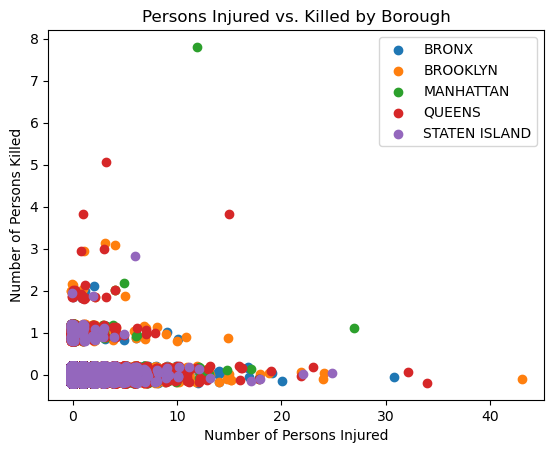

In [44]:
# Data plotting to explore dataset

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

jitter_magnitude = 0.2

# Group by borough to apply different colors automatically
for name, group in mvc_cleaned.groupby('BOROUGH'):
    # Apply jitter: random uniform distribution within the specified range
    jittered_x = group['NUMBER OF PERSONS INJURED'] + np.random.uniform(-jitter_magnitude, jitter_magnitude, size=len(group))
    jittered_y = group['NUMBER OF PERSONS KILLED'] + np.random.uniform(-jitter_magnitude, jitter_magnitude, size=len(group))
    
    ax.scatter(jittered_x, jittered_y, label=name)

ax.set_xlabel('Number of Persons Injured')
ax.set_ylabel('Number of Persons Killed')
ax.set_title('Persons Injured vs. Killed by Borough')
ax.legend()

plt.show()

In [45]:
# Borough stats
borough_stats = mvc_cleaned.groupby('BOROUGH').agg(
    total_accidents=('BOROUGH', 'size'),  # Counting the number of rows (accidents) per group
    total_persons_injured=('NUMBER OF PERSONS INJURED', 'sum'),
    total_persons_killed=('NUMBER OF PERSONS KILLED', 'sum')
).reset_index()

# Calculate proportions
borough_stats['injured_per_accident'] = borough_stats['total_persons_injured'] / borough_stats['total_accidents']
borough_stats['killed_per_accident'] = borough_stats['total_persons_killed'] / borough_stats['total_accidents']

print(borough_stats)

         BOROUGH  total_accidents  total_persons_injured  \
0          BRONX           211407                69185.0   
1       BROOKLYN           454849               150423.0   
2      MANHATTAN           320297                67406.0   
3         QUEENS           383458               115389.0   
4  STATEN ISLAND            60024                17152.0   

   total_persons_killed  injured_per_accident  killed_per_accident  
0                 274.0              0.327260             0.001296  
1                 624.0              0.330710             0.001372  
2                 330.0              0.210448             0.001030  
3                 528.0              0.300917             0.001377  
4                  95.0              0.285752             0.001583  


In [46]:
borough_stats.head()

,BOROUGH,total_accidents,total_persons_injured,total_persons_killed,injured_per_accident,killed_per_accident
0,BRONX,211407,69185.0,274.0,0.327260,0.001296
1,BROOKLYN,454849,150423.0,624.0,0.330710,0.001372
2,MANHATTAN,320297,67406.0,330.0,0.210448,0.001030
3,QUEENS,383458,115389.0,528.0,0.300917,0.001377
4,STATEN ISLAND,60024,17152.0,95.0,0.285752,0.001583


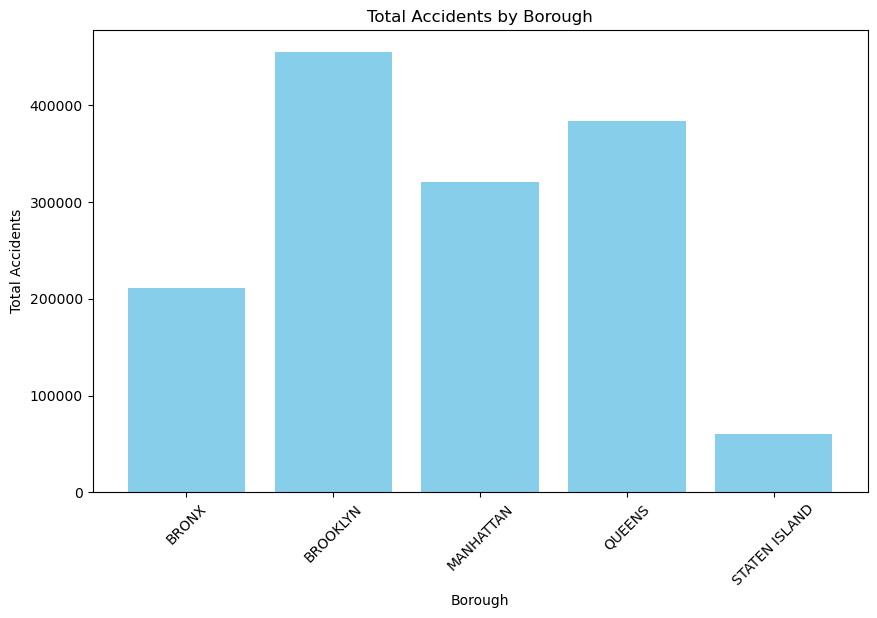

In [48]:
# Total Accidents by borough
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the plot
plt.bar(borough_stats['BOROUGH'], borough_stats['total_accidents'], color='skyblue')  # You can customize the color
plt.xlabel('Borough')
plt.ylabel('Total Accidents')
plt.title('Total Accidents by Borough')
plt.xticks(rotation=45)  # Optional: Rotates the x-axis labels to make them more readable
plt.show()

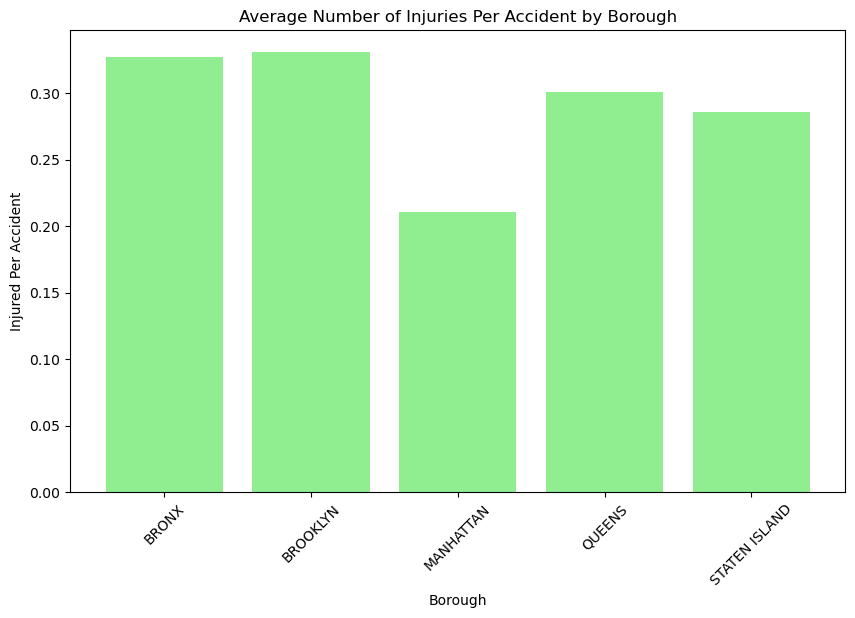

In [50]:
# Average number of injuries per accident by borough
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the plot
plt.bar(borough_stats['BOROUGH'], borough_stats['injured_per_accident'], color='lightgreen')  # You can customize the color
plt.xlabel('Borough')
plt.ylabel('Injured Per Accident')
plt.title('Average Number of Injuries Per Accident by Borough')
plt.xticks(rotation=45)  # Optional: Rotates the x-axis labels to make them more readable
plt.show()

In [51]:
# date and time in each borough for accident